In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-cleaned-csv/life_expectancy_clean.csv


In [13]:
import pandas as pd
df = pd.read_csv("/kaggle/input/life-expectancy-cleaned-csv/life_expectancy_clean.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [14]:
#import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro,anderson
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [24]:
#Basic Descriptive Statistics for the numerical columns
df['Year'] = df['Year'].astype('str')
num_cols = df.select_dtypes(include=[np.number]).columns
df_num = df[num_cols]
desc_stats = df_num.describe().T
desc_stats['median'] = df_num.median()
desc_stats['mode'] = df_num.mode().iloc[0]
desc_stats['std'] = df_num.std()
desc_stats['iqr'] = df_num.quantile(0.75) - df_num.quantile(0.25)
desc_stats['skewness'] = df_num.skew()
desc_stats['kurtosis'] = df_num.kurtosis()

print(desc_stats[['mean','median','mode','std','min','max','iqr','skewness','kurtosis']])

                                         mean        median          mode  \
Life expectancy                  6.922493e+01  7.200000e+01  7.300000e+01   
Adult Mortality                  1.647964e+02  1.440000e+02  1.200000e+01   
infant deaths                    3.030395e+01  3.000000e+00  0.000000e+00   
Alcohol                          4.602861e+00  4.160000e+00  1.000000e-02   
percentage expenditure           7.382513e+02  6.491291e+01  0.000000e+00   
Hepatitis B                      8.094046e+01  8.700000e+01  8.094046e+01   
Measles                          2.419592e+03  1.700000e+01  0.000000e+00   
 BMI                             3.832125e+01  4.300000e+01  3.832125e+01   
under-five deaths                4.203574e+01  4.000000e+00  0.000000e+00   
Polio                            8.255019e+01  9.300000e+01  9.900000e+01   
Total expenditure                5.938190e+00  5.938190e+00  5.938190e+00   
Diphtheria                       8.232408e+01  9.300000e+01  9.900000e+01   

Histograms show the frequency distribution of a numerical variable by dividing the data into bins.

KDE (Kernel Density Estimate) plots provide a smoothed version of the histogram, showing the probability density function of the variable

Boxplots provide a five-number summary of a numerical variable: minimum, first quartile (Q1), median (Q2), third quartile (Q3),and maximum.
They are excellent for identifying the spread of the data and detecting outliers.

The distribution of life expectancy appears approximately normal, suggesting that most countries have life expectancies clustered around the average, with fewer countries at the very high or very low ends.

The Adult Mortality distribution is heavily right-skewed, indicating that while most countries have lower adult mortality rates, a smaller number of countries experience significantly higher rates.

The Income Composition of resources shows a slight left-skew, implying that while many countries have moderate to high income composition, a few countries have notably lower values.

UNIMODAL : Schooling , Infant Deaths.

BIMODAL : Thinness and Polio.

MULTIMODAL : Income Composition of Resources.

From the Box Plot ,the median of Life Expectancy is approximately 72 years, meaning half of the countries in the dataset have a life expectancy below 72 years and half have above.

The IQR for Schooling is approximately from 10 to 14 years, indicating that the middle 50% of countries have schooling durations within this range. The relatively narrow box suggests moderate variability in schooling across countries.

The Income Composition of Resources captures most of the data with low count of outliers.

Right-Skewed : Adult Mortality Rate, some countries lie far higher in adult mortality rate compared to most of the countries in the dataset.

Left-Skewed : Life Expectancy, some countries have very low life expectancy when compared to most of the countries in the dataset.

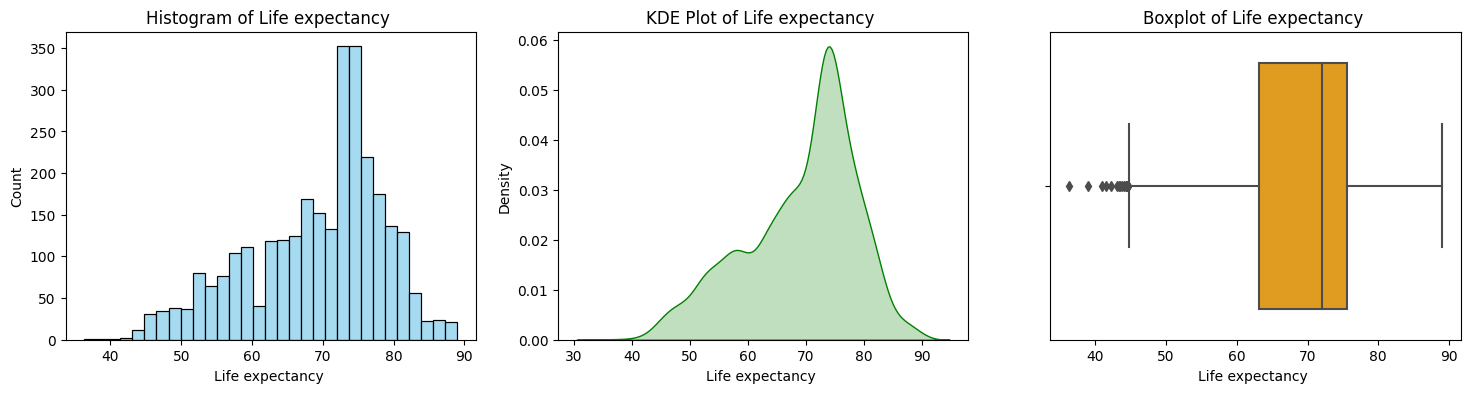

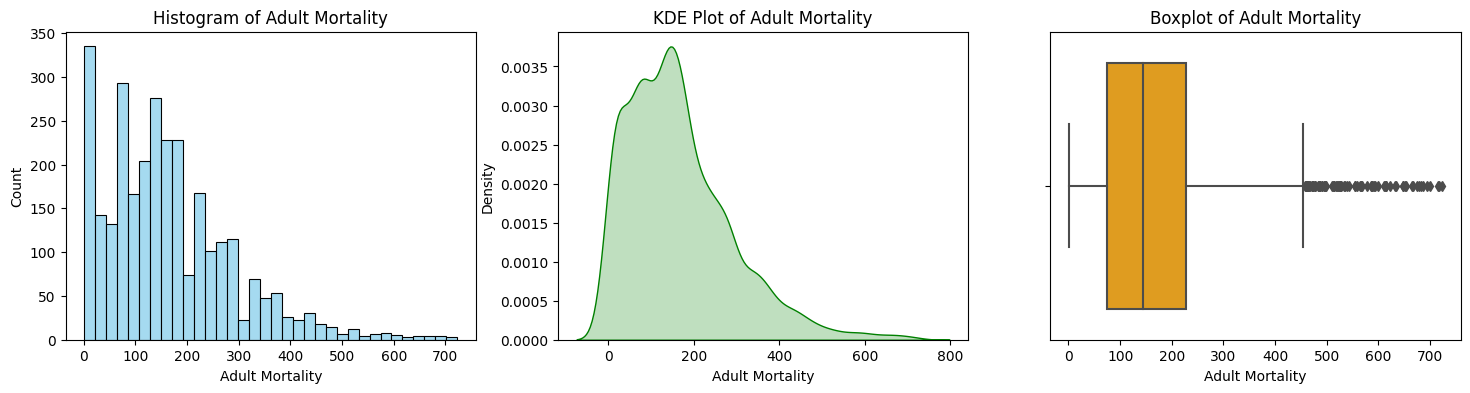

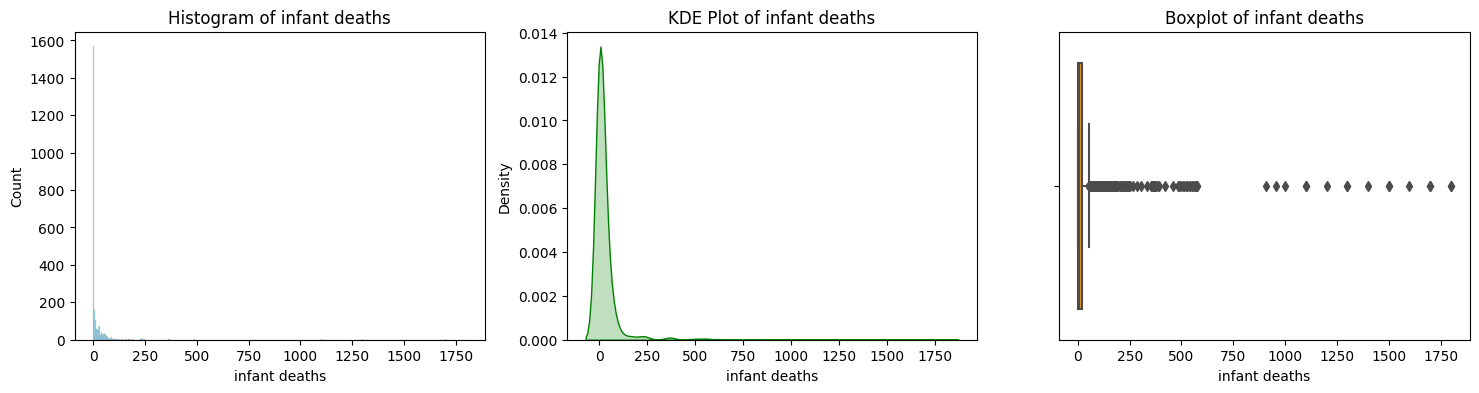

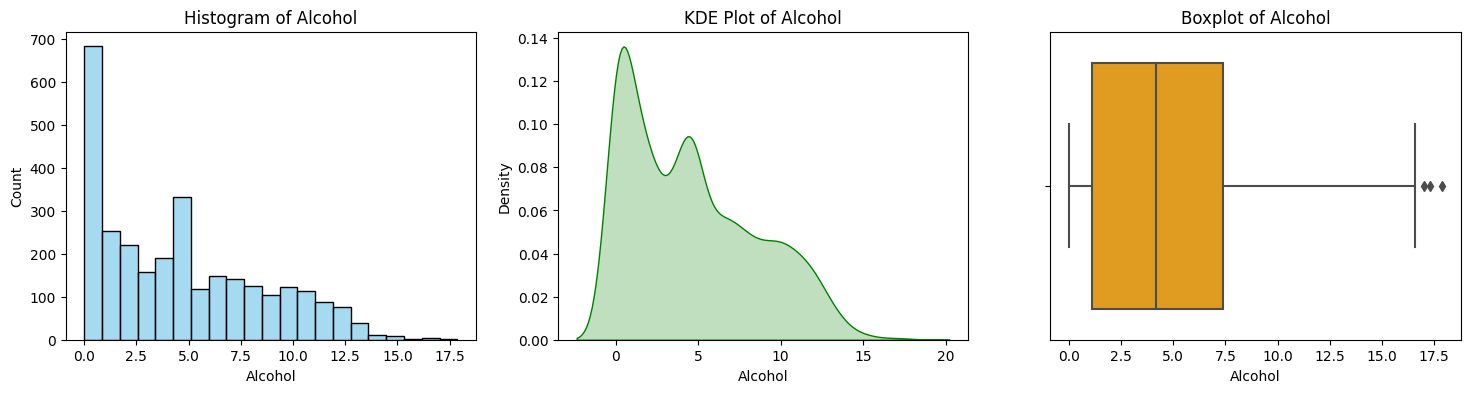

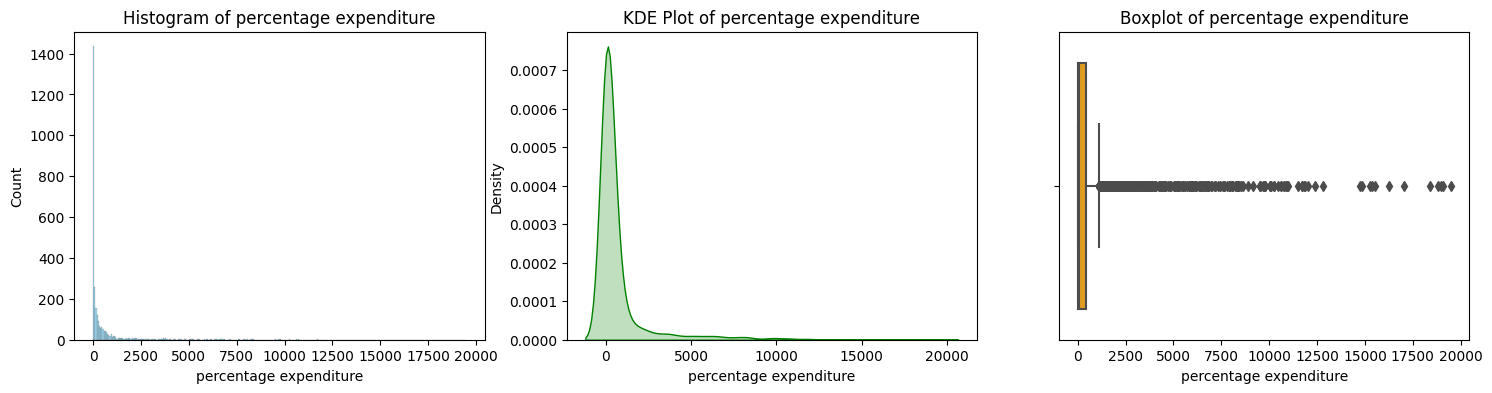

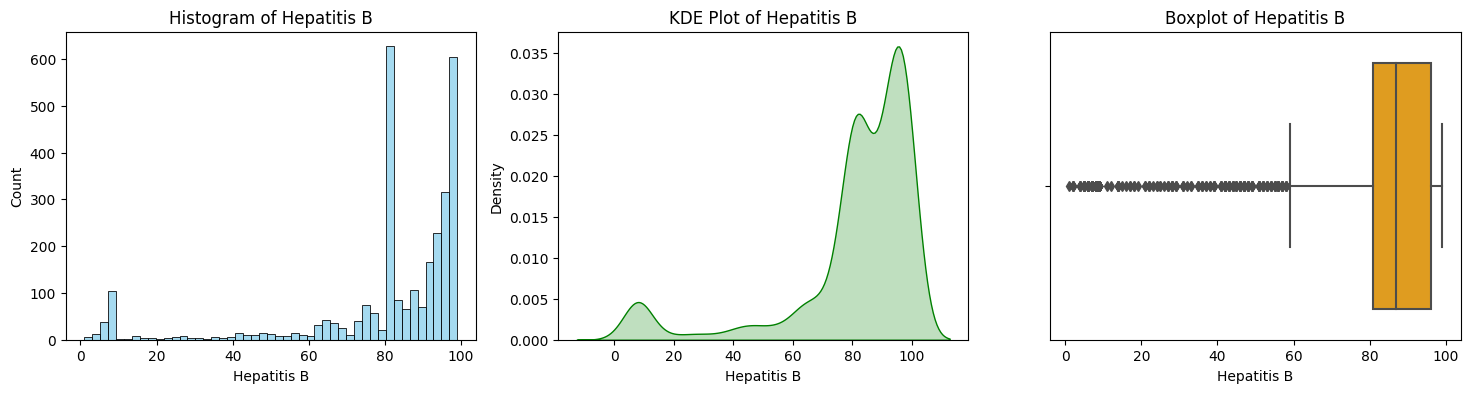

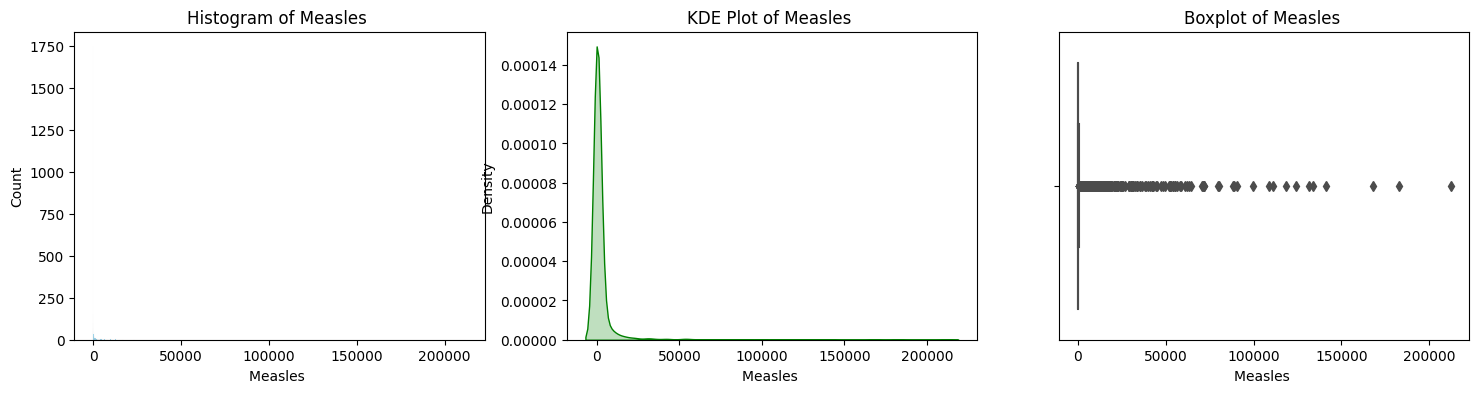

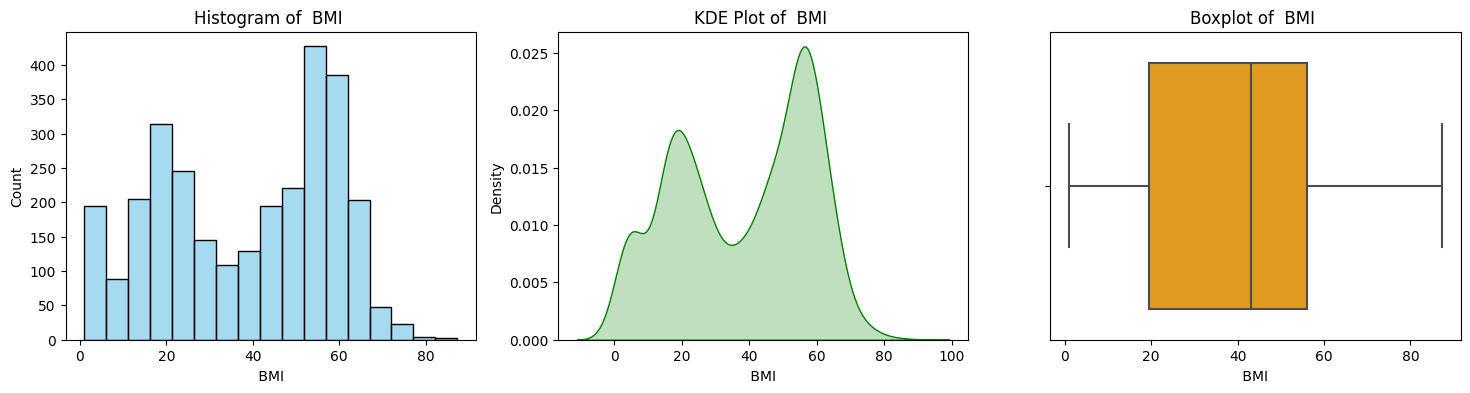

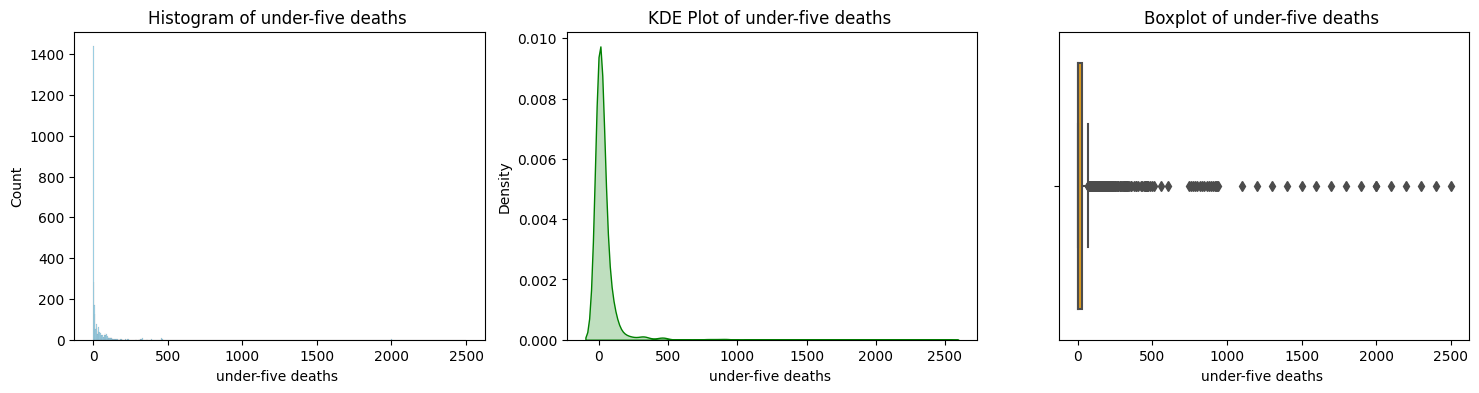

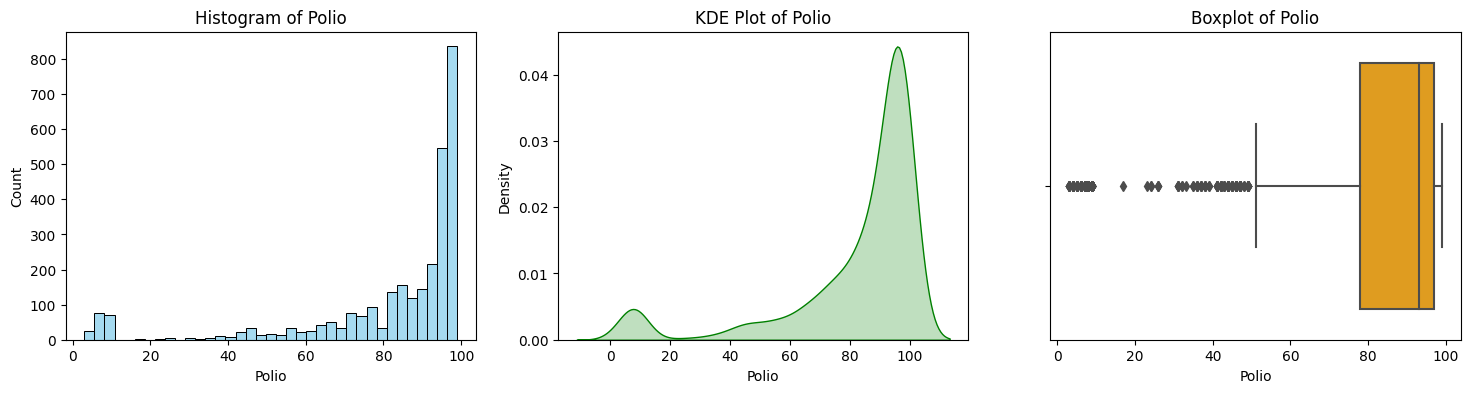

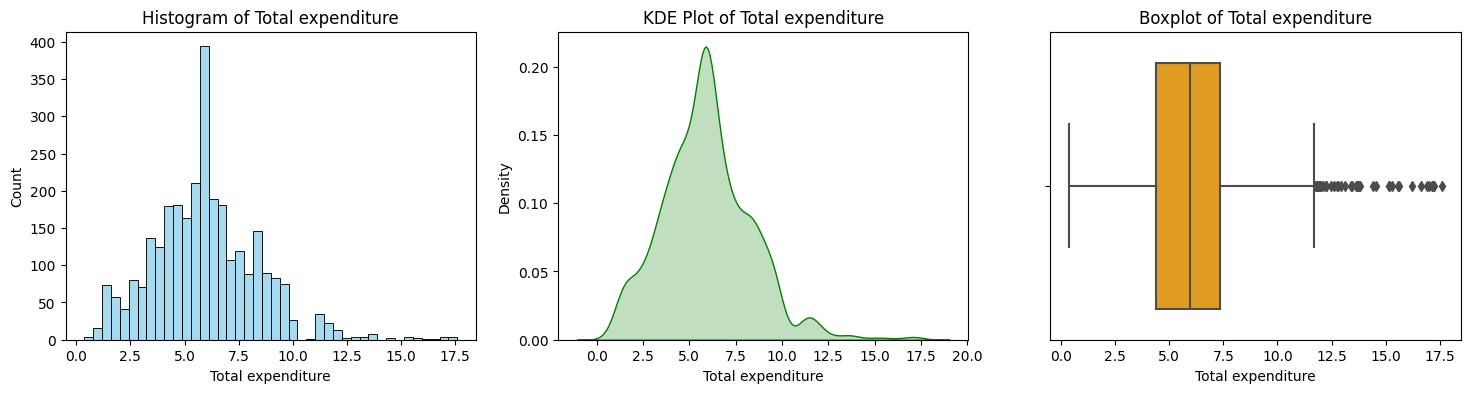

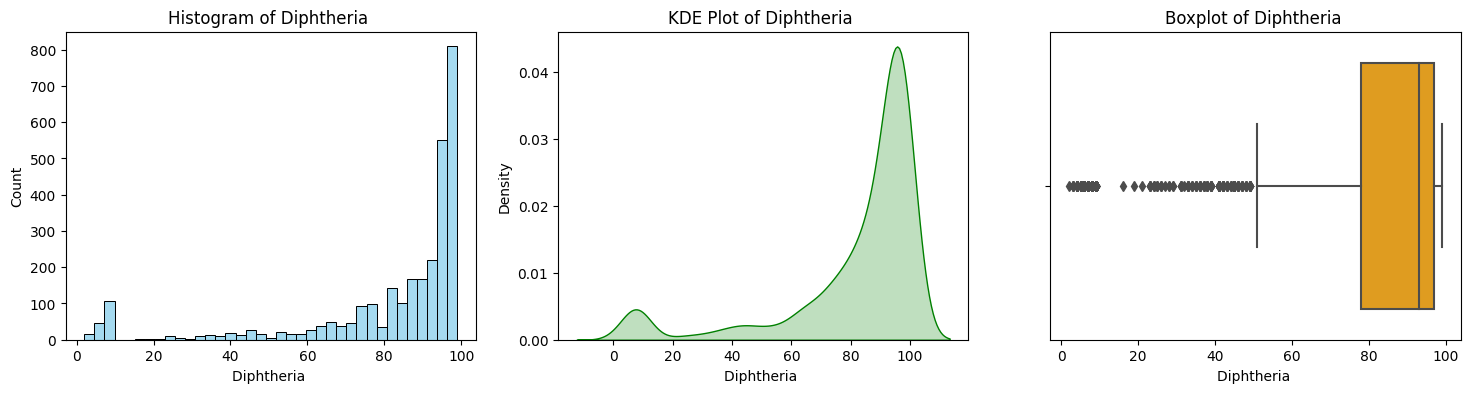

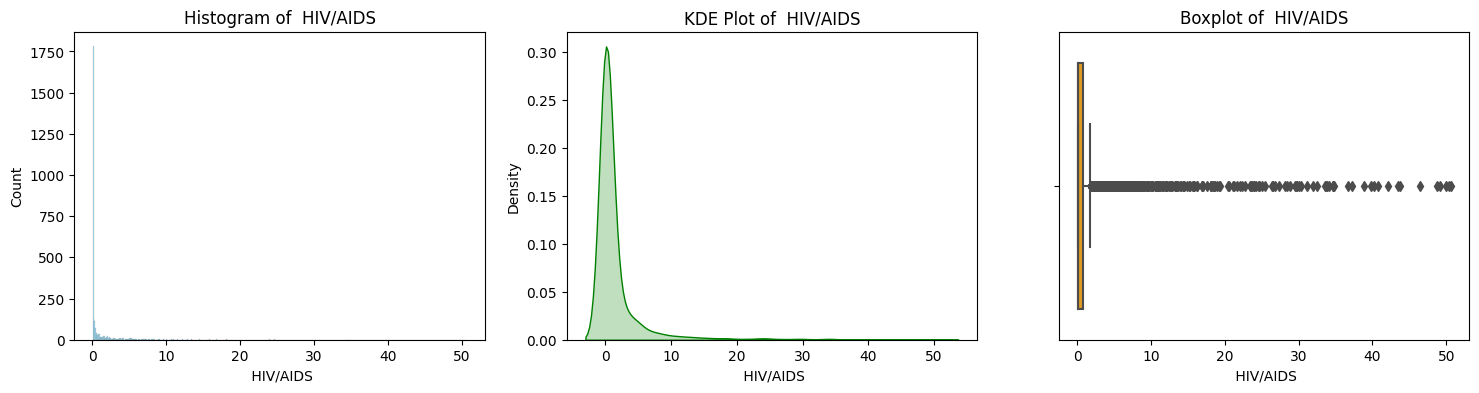

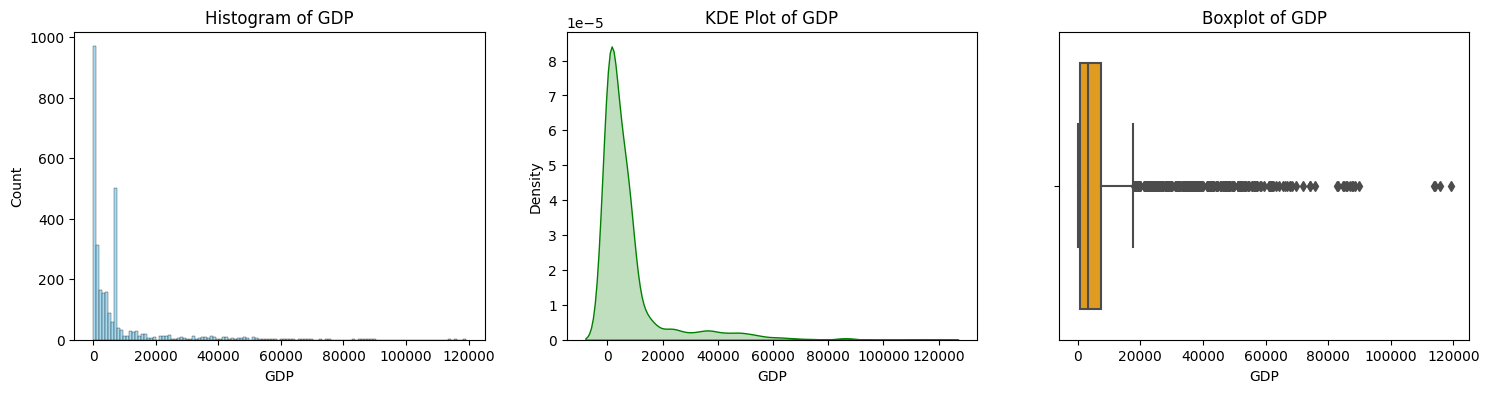

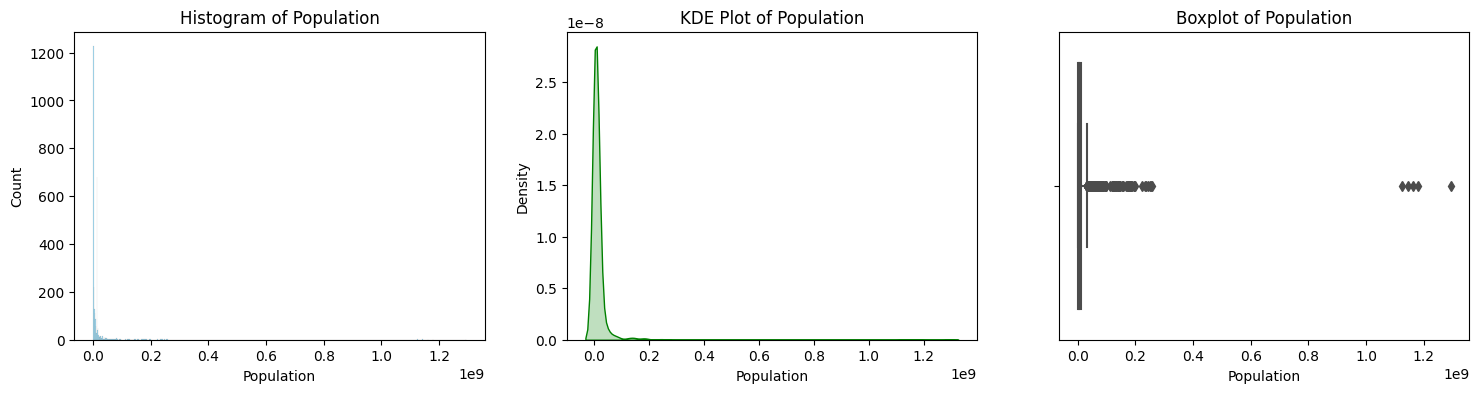

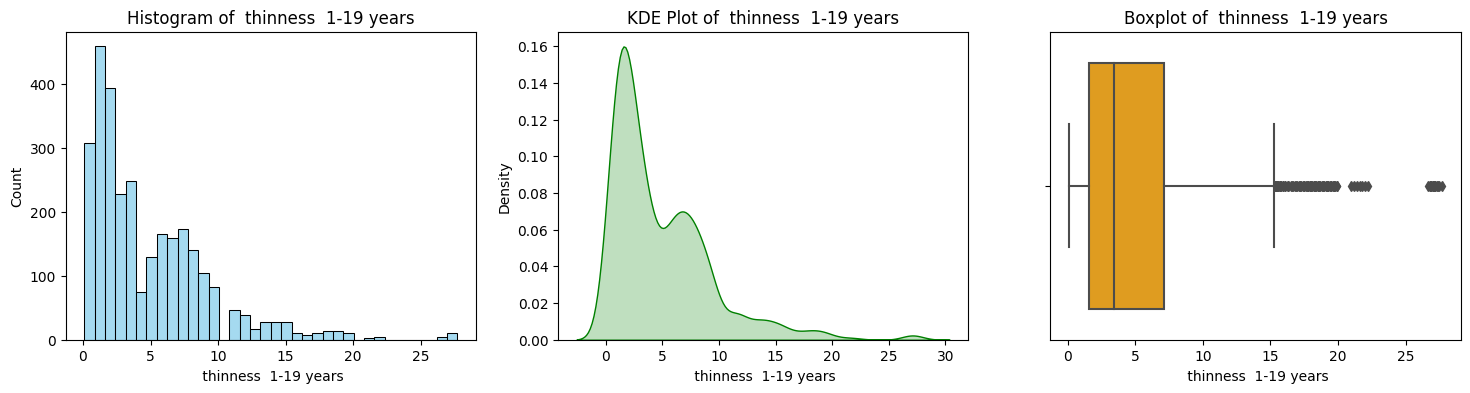

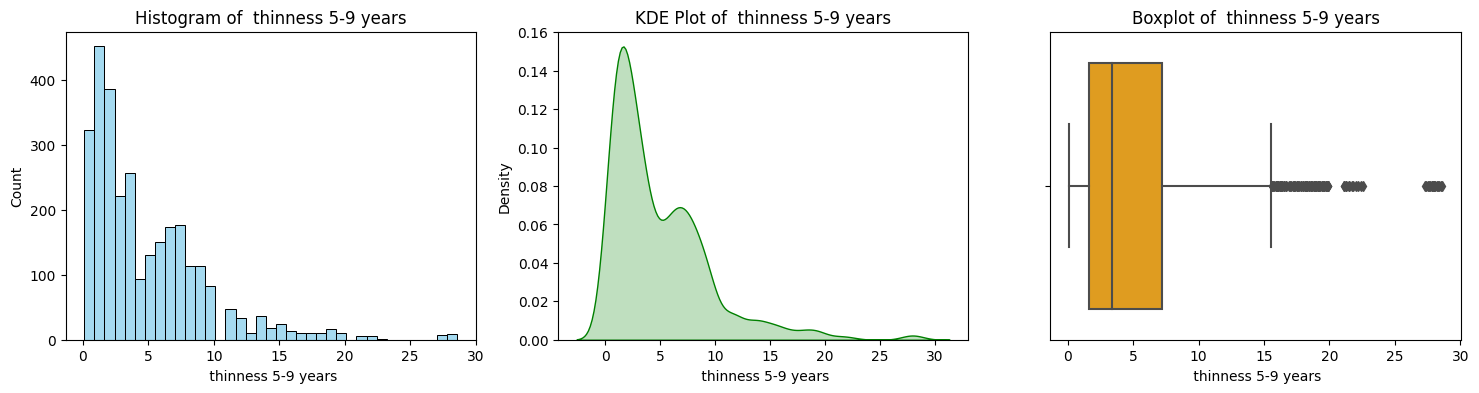

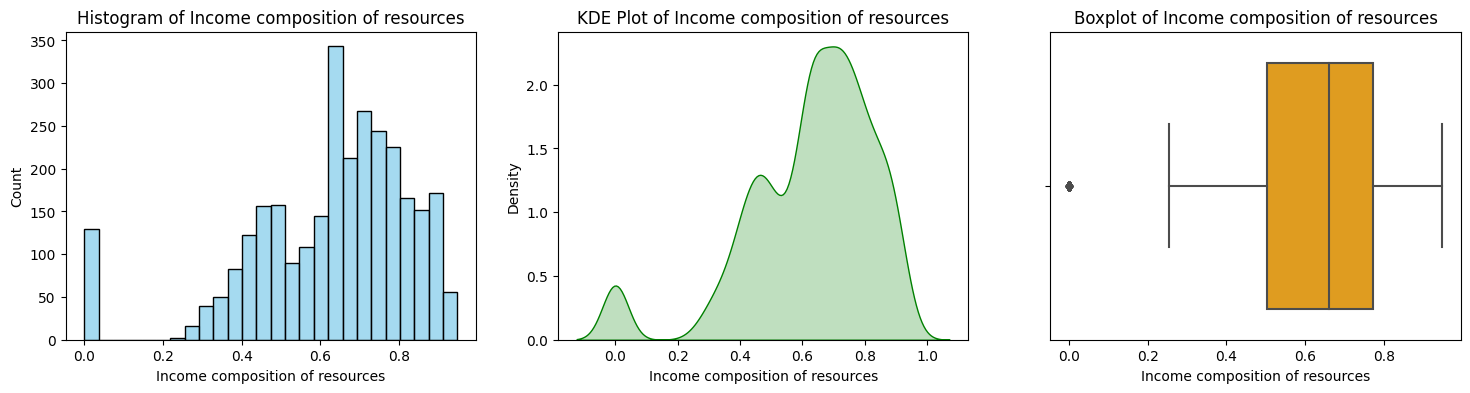

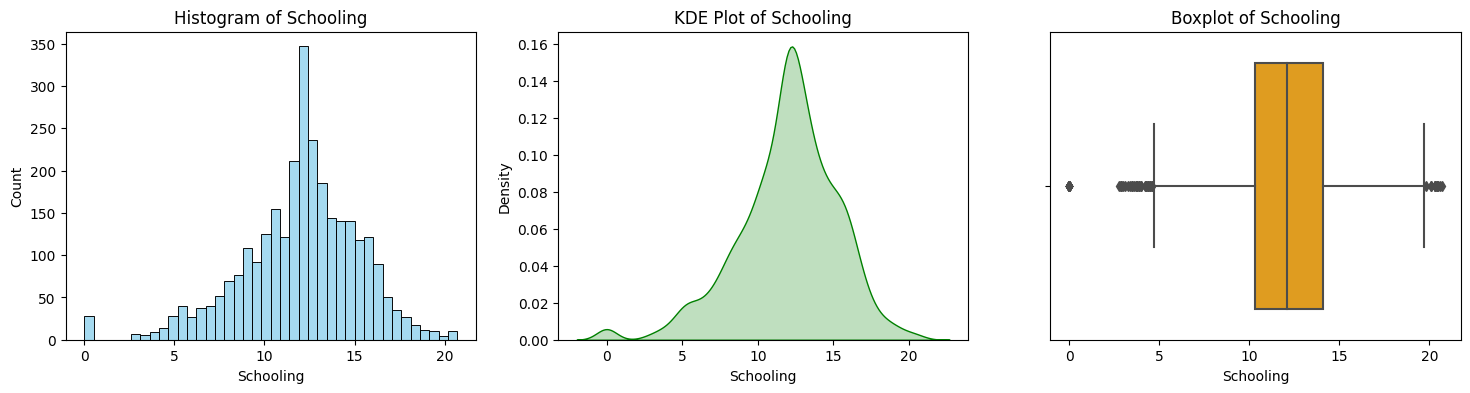

In [16]:
#Create Histograms, KDE plots, and boxplots for numerical features.
for col in num_cols:
    fig,axs = plt.subplots(1,3,figsize=(18,4))

    sns.histplot(df[col],kde=False,ax=axs[0],color='skyblue')
    axs[0].set_title(f'Histogram of {col}')
    axs[0].set_xlabel(col)

    sns.kdeplot(df[col],ax=axs[1],shade=True,color='green')
    axs[1].set_title(f'KDE Plot of {col}')
    axs[1].set_xlabel(col)

    sns.boxplot(x=df[col],ax=axs[2],color='orange')
    axs[2].set_title(f'Boxplot of {col}')
    axs[2].set_xlabel(col)

    plt.show()

Countries listed in Developing status is the dominant category, suggesting that the dataset is primarily focused on or skewed towards observations from developing nations.

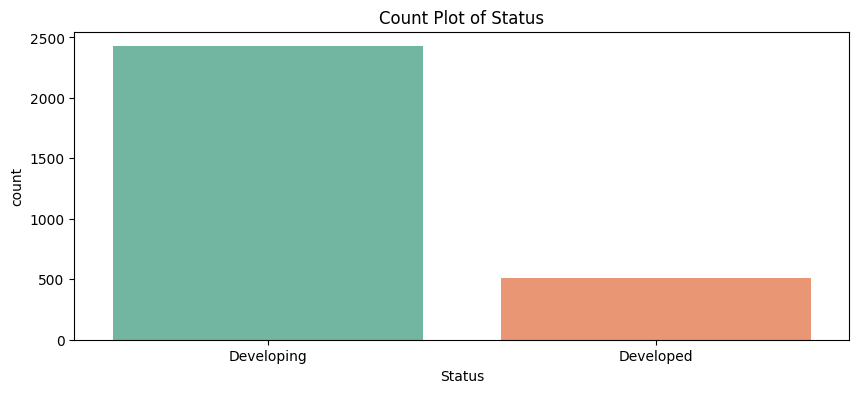

In [17]:
#Identify categorical columns and make count plots
# cat_cols = df.select_dtypes(include='object').columns

# for col in cat_cols:
#     plt.figure(figsize=(10,4))
#     sns.countplot(data=df,x=col,palette='Set2')
#     plt.title(f"Count Plot of {col}")
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()
plt.figure(figsize=(10,4))
sns.countplot(data=df,x=df['Status'],palette='Set2')
plt.title("Count Plot of Status")
plt.show()

Q-Q plot is a graphical tool to help assess if a dataset follows a particular theoretical distribution, in this case, the normal distribution

Here, Life Expectancy and Total Expenditure is approximately normally distributed.(Near-Normal Data)



<Figure size 600x400 with 0 Axes>

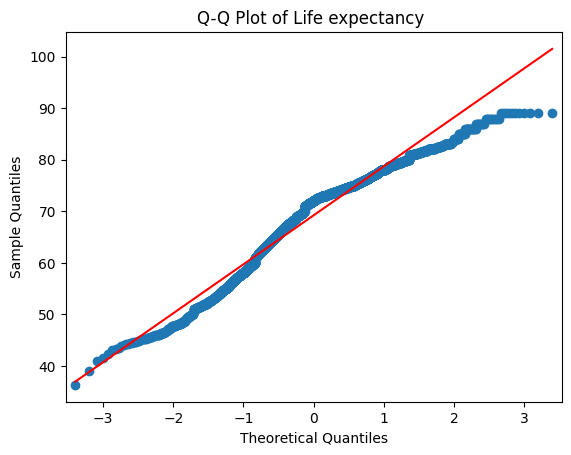

<Figure size 600x400 with 0 Axes>

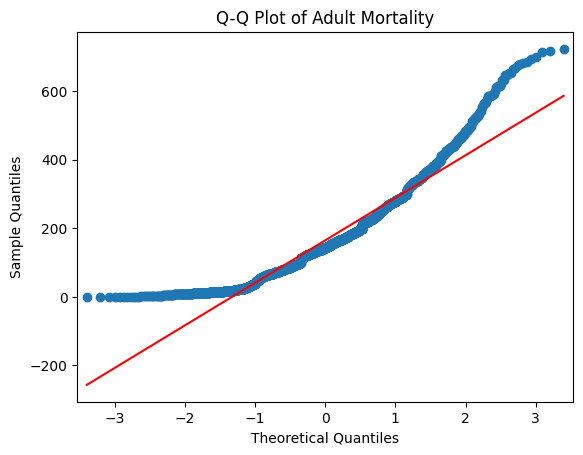

<Figure size 600x400 with 0 Axes>

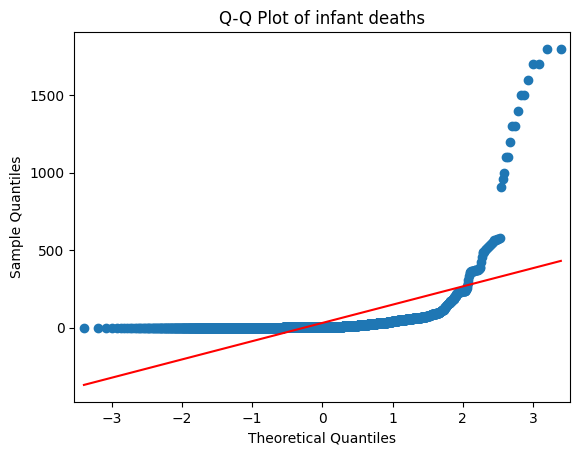

<Figure size 600x400 with 0 Axes>

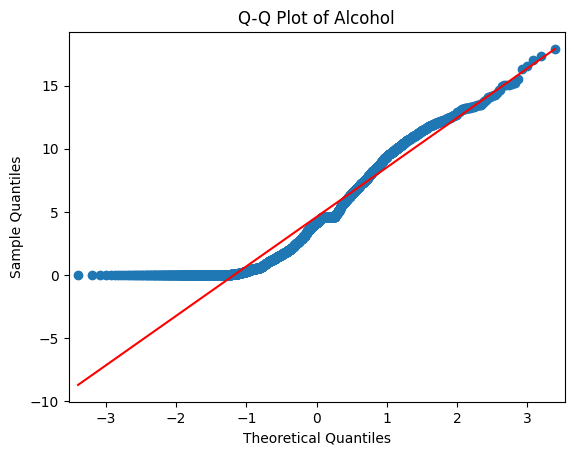

<Figure size 600x400 with 0 Axes>

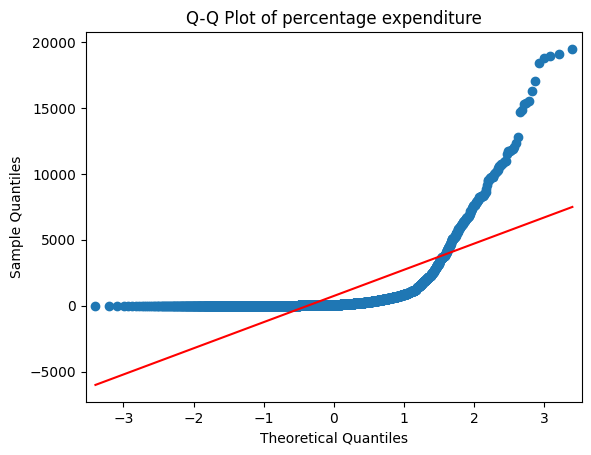

<Figure size 600x400 with 0 Axes>

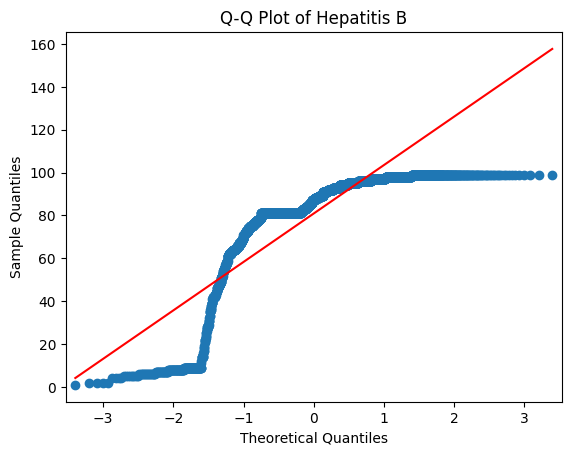

<Figure size 600x400 with 0 Axes>

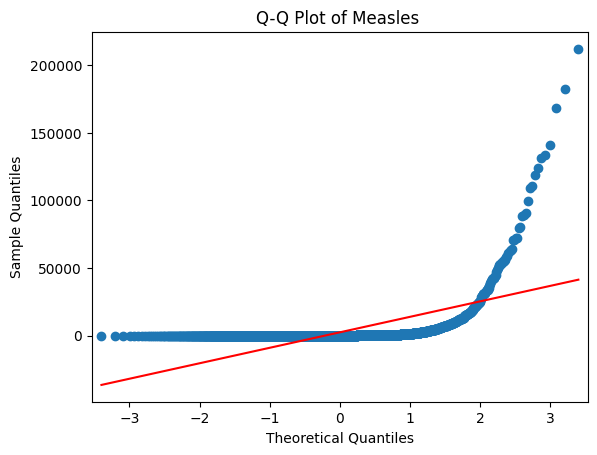

<Figure size 600x400 with 0 Axes>

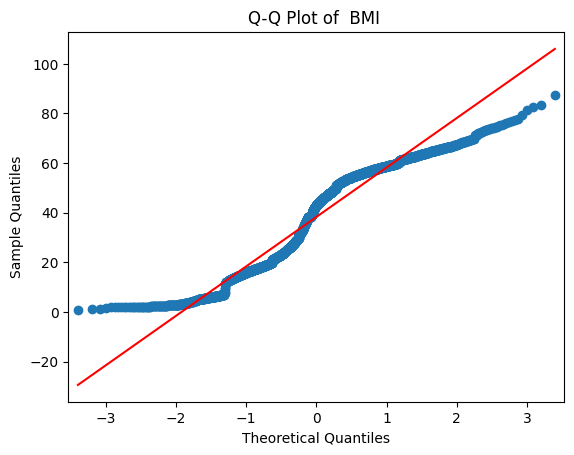

<Figure size 600x400 with 0 Axes>

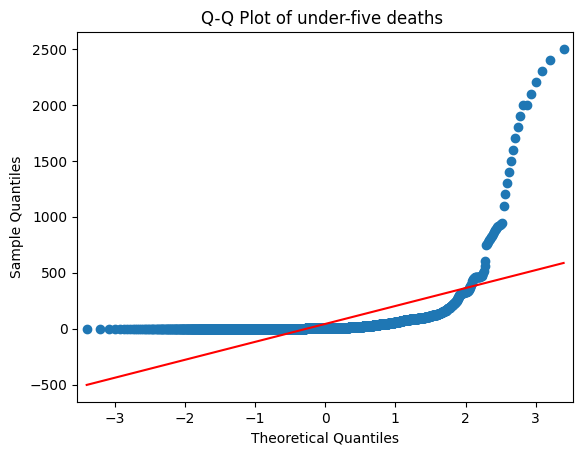

<Figure size 600x400 with 0 Axes>

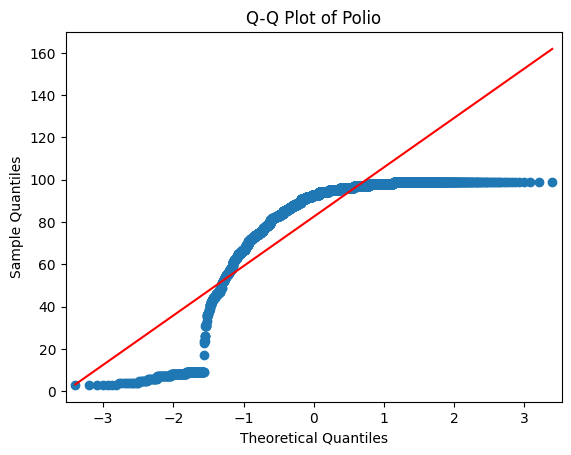

<Figure size 600x400 with 0 Axes>

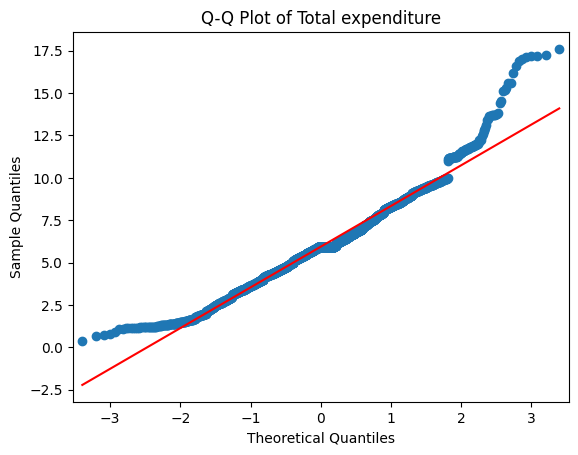

<Figure size 600x400 with 0 Axes>

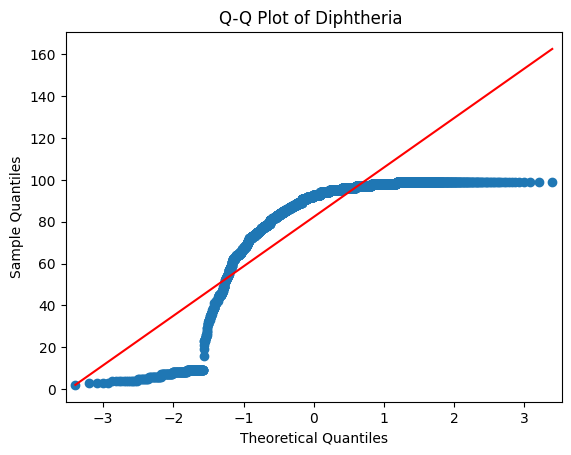

<Figure size 600x400 with 0 Axes>

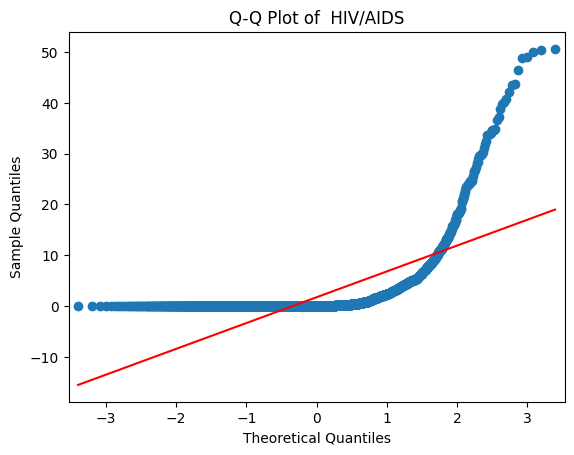

<Figure size 600x400 with 0 Axes>

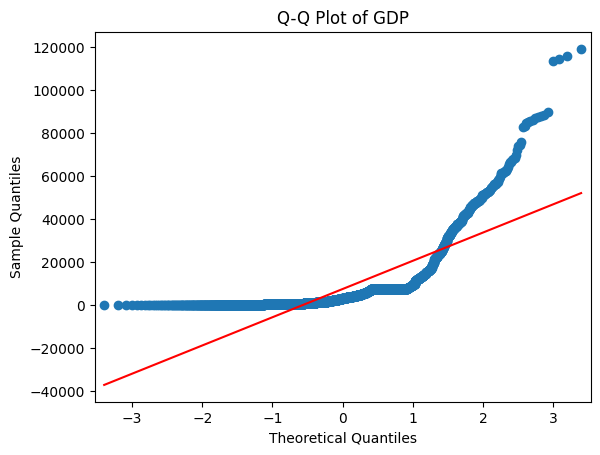

<Figure size 600x400 with 0 Axes>

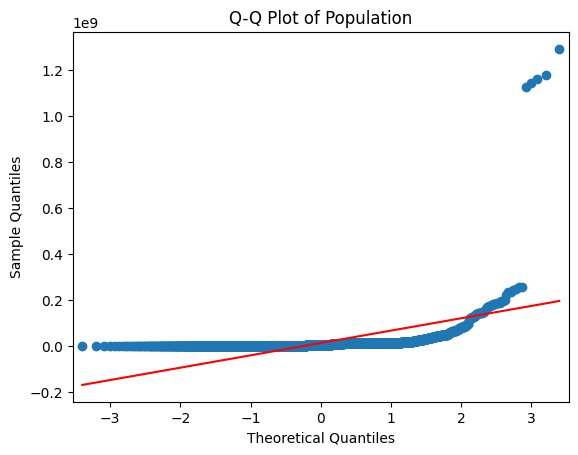

<Figure size 600x400 with 0 Axes>

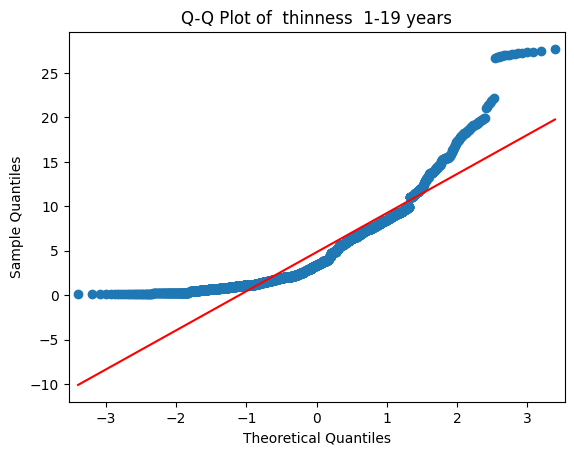

<Figure size 600x400 with 0 Axes>

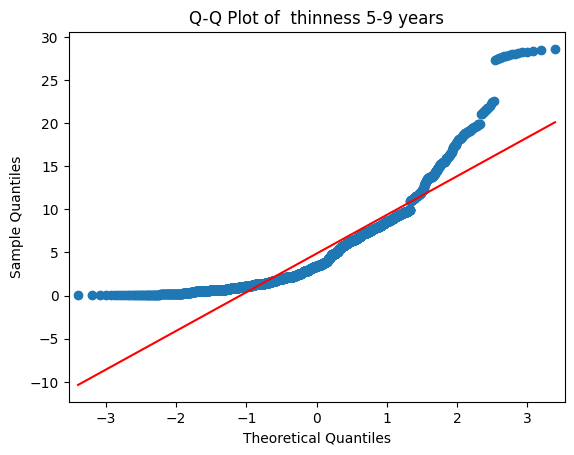

<Figure size 600x400 with 0 Axes>

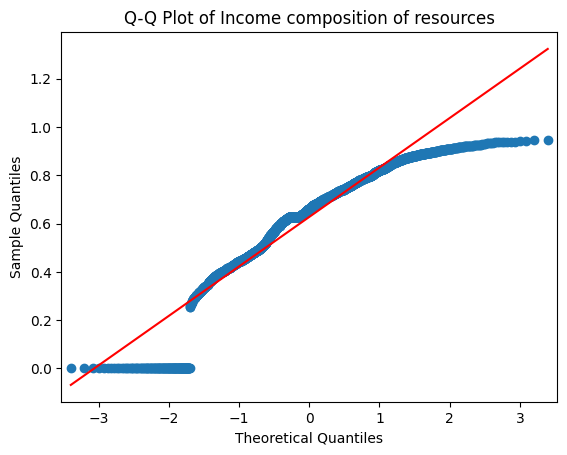

<Figure size 600x400 with 0 Axes>

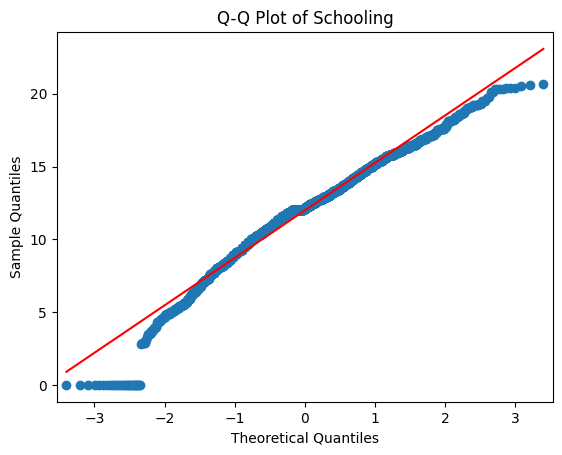

In [19]:
#import necessary libraries for Q-Q Plots
import statsmodels.api as sm
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(6,4))
    sm.qqplot(df[col],line='s')
    plt.title(f"Q-Q Plot of {col}")
    plt.show()

In [49]:
import pandas as pd
from scipy.stats import shapiro

# Load data
data = pd.read_csv("/kaggle/input/life-expectancy-cleaned-csv/life_expectancy_clean.csv")

# Drop 'Year' column if needed
data = data.drop(columns=['Year'])

# Select numeric columns again
num_col = data.select_dtypes(include=['int64', 'float64']).columns

shapiro_results = {}

for col in num_col:
    # Drop NA values from the column data before test
    col_data = data[col].dropna()

    # Ensure data is numeric
    if col_data.dtype.kind in 'fi':  # float or int
        stat, p_value = shapiro(col_data)
        shapiro_results[col] = {'Statistic': stat, 'p-value': p_value}
    else:
        print(f"Skipping {col}, not numeric.")

# Print results
for col, results in shapiro_results.items():
    print(f"\nShapiro-Wilk Test for {col}:")
    print(f"Statistic: {results['Statistic']:.4f}, p-value: {results['p-value']:.4f}")



Shapiro-Wilk Test for Life expectancy :
Statistic: 0.9563, p-value: 0.0000

Shapiro-Wilk Test for Adult Mortality:
Statistic: 0.9168, p-value: 0.0000

Shapiro-Wilk Test for infant deaths:
Statistic: 0.2319, p-value: 0.0000

Shapiro-Wilk Test for Alcohol:
Statistic: 0.9207, p-value: 0.0000

Shapiro-Wilk Test for percentage expenditure:
Statistic: 0.4067, p-value: 0.0000

Shapiro-Wilk Test for Hepatitis B:
Statistic: 0.7040, p-value: 0.0000

Shapiro-Wilk Test for Measles :
Statistic: 0.2068, p-value: 0.0000

Shapiro-Wilk Test for  BMI :
Statistic: 0.9334, p-value: 0.0000

Shapiro-Wilk Test for under-five deaths :
Statistic: 0.2403, p-value: 0.0000

Shapiro-Wilk Test for Polio:
Statistic: 0.6874, p-value: 0.0000

Shapiro-Wilk Test for Total expenditure:
Statistic: 0.9730, p-value: 0.0000

Shapiro-Wilk Test for Diphtheria :
Statistic: 0.6858, p-value: 0.0000

Shapiro-Wilk Test for  HIV/AIDS:
Statistic: 0.3568, p-value: 0.0000

Shapiro-Wilk Test for GDP:
Statistic: 0.5629, p-value: 0.0000


Diphtheria (170), Polio (172), and Hepatitis B (161) had the highest number of outliers, possibly reflecting inconsistencies or vast differences in immunization rates across countries.

Income Composition of Resources (130) and HIV/AIDS (69) also exhibited large numbers of outliers, suggesting wide disparities in health resource distribution and disease prevalence.

Features such as Adult Mortality (40), Infant Deaths (37), Under-Five Deaths (34), and Measles (48) had relatively fewer outliers, indicating more consistent patterns across observations, or possibly reflecting improvements in child healthcare over time.

A few features, like Population (24) and Schooling (28), had very few outliers. These features are likely more stable or follow a narrower distribution across the dataset.

In [44]:
#evaluate the z-score and find the outliers
from scipy.stats import zscore

z_score = np.abs(zscore(df[num_cols]))
outliers = (z_score > 3)

#Count of outliers in each coloumn
outlier_counts = outliers.sum(axis=0)
for col, count in zip(num_cols,outlier_counts):
    if count >0:
        print(f"{col}:{count}")

Life expectancy :2
Adult Mortality:40
infant deaths:37
Alcohol:5
percentage expenditure:84
Hepatitis B:161
Measles :48
under-five deaths :34
Polio:172
Total expenditure:26
Diphtheria :170
 HIV/AIDS:69
GDP:91
Population:24
 thinness  1-19 years:54
 thinness 5-9 years:57
Income composition of resources:130
Schooling:28
